In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sacc
from scipy.interpolate import interp1d
import fitsio
from scipy.optimize import curve_fit

def get_r(cv):
    cv_d = np.diag(cv)
    return cv / np.sqrt(cv_d[:, None] * cv_d[None, :])

# Bias

In [12]:
import NzMarg_data

In [17]:
biases = {}
biases['deswl'] = NzMarg_data.DES_bzi('metacal', fixed_fit=False)
biases['deswl_fixed'] = NzMarg_data.DES_bzi('metacal', fixed_fit=True)
biases['deswl_mag'] = NzMarg_data.mag_bias(22.5)

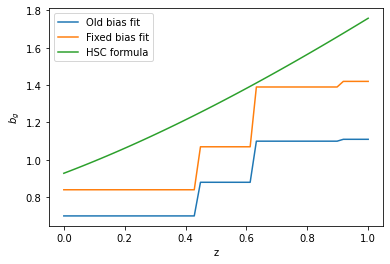

In [19]:
z = np.linspace(0, 1, 50)
plt.plot(z, biases['deswl'](z), label='Old bias fit')
plt.plot(z, biases['deswl_fixed'](z), label='Fixed bias fit')
plt.plot(z, biases['deswl_mag'](z), label='HSC formula')
plt.xlabel('z')
plt.ylabel('$b_g$')
plt.legend()
plt.show()
plt.close()

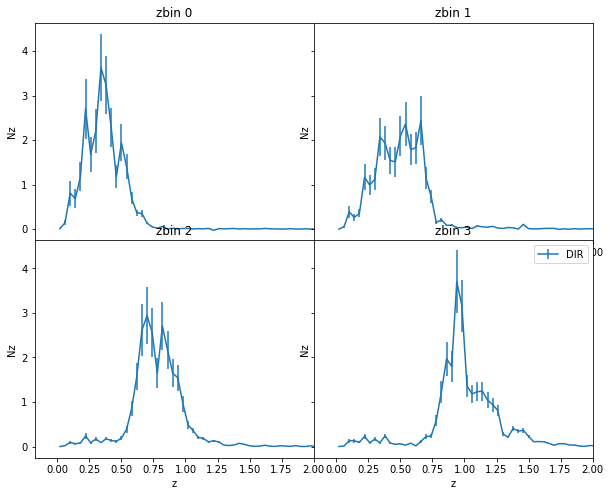

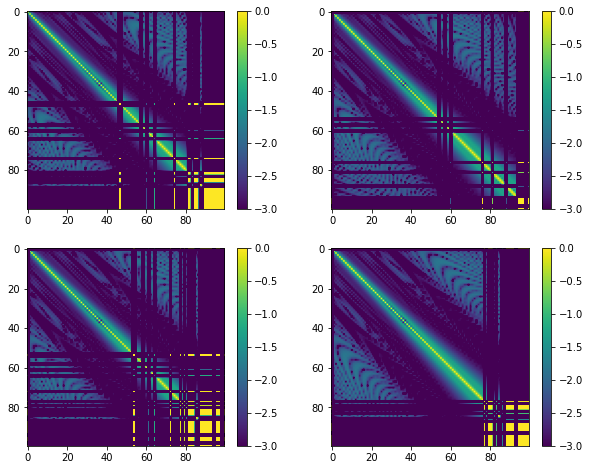

DESwl__0 0.3717194583145684 0.00010991888121538313 0.007197467509258444 0.007197467509258445
DESwl__1 0.5062540175663707 0.0001176623438719816 0.007602830982913679 0.007602830982913679
DESwl__2 0.7763710849632749 -2.490561867545057e-05 0.0056629421341641145 0.005662942134164115
DESwl__3 1.0080105653048095 7.255738200984002e-05 0.005874243941101294 0.005874243941101293


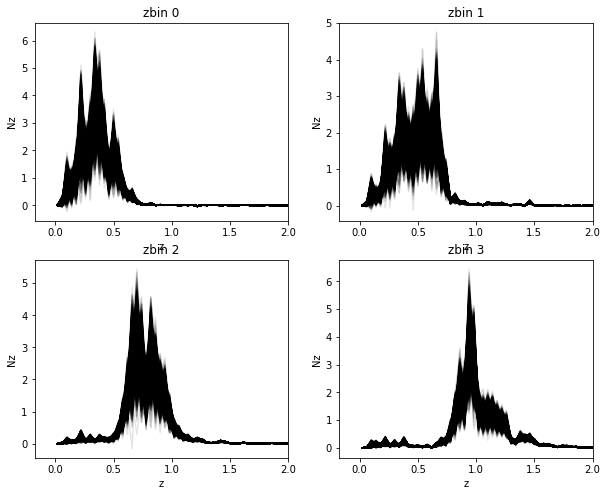

In [7]:
s = sacc.Sacc.load_fits('output/DESwl_NzMarg_full_sample_metacal_R/DESwl_NzMarg_full_sample_metacal_R_cls_NzMarg_cov_p5.0_area2_diag1.fits')
cov_master_all = np.load('output/DESwl_NzMarg_full_sample_metacal_R/DESwl_NzMarg_full_sample_metacal_R_covar_master_area2.npz')

survey = 'DESwl'
cov_master = cov_master_all[f'{survey}x{survey}']
err_master = np.sqrt(np.diag(cov_master))

f, ax = plt.subplots(2, 2, figsize=(10, 8), gridspec_kw={'hspace': 0, 'wspace':0}, sharey=True)
ax = ax.reshape(-1)
for trn, trv in s.tracers.items():
    if survey not in trn:
        continue
    i = int(trn.split('__')[-1])
        
    # Production
    c = np.sum(trv.nz) * (trv.z[1] - trv.z[0])
    nz = trv.nz / c
    err = nz * err_master
    ax[i].errorbar(trv.z, nz, yerr=err, label='DIR') 
    
    ax[i].set_xlabel('z')
    ax[i].set_ylabel('Nz')
    ax[i].set_title(f'zbin {i}')
    ax[i].set_xlim([None, 2])
plt.legend()
plt.show()


f, ax = plt.subplots(2, 2, figsize=(10, 8),)
ax = ax.reshape(-1)
for trn, trv in s.tracers.items():
    if survey not in trn:
        continue
    i = int(trn.split('__')[-1])
        
    # Production
    c = np.sum(trv.nz) * (trv.z[1] - trv.z[0])
    nz = trv.nz / c
    
    nz_cov = nz[:, None] * nz[None, :] * cov_master + 1e-100

    im = ax[i].imshow(np.log10(np.fabs(get_r(nz_cov))), vmin=-3, vmax=0)
    f.colorbar(im, ax=ax[i], orientation='vertical')  
plt.show()


f, ax = plt.subplots(2, 2, figsize=(10, 8),)
ax = ax.reshape(-1)
for trn, trv in s.tracers.items():
    if survey not in trn:
        continue
    i = int(trn.split('__')[-1])
        
    # Production
    c = np.sum(trv.nz) * (trv.z[1] - trv.z[0])
    nz = trv.nz / c
    
    nz_cov = nz[:, None] * nz[None, :] * cov_master + 1e-100
    zmean = np.sum(nz * trv.z)/np.sum(nz)
    
    nzreal = np.random.multivariate_normal(nz, nz_cov, size=10000)
    zmeans = np.sum(nzreal*trv.z[None, :], axis=-1)/np.sum(nzreal, axis=-1)
    for n in nzreal:
        ax[i].plot(trv.z, n, 'k-', alpha=0.1)
    print(trn, zmean, np.mean(zmeans - zmean), np.std(zmeans - zmean), np.std(zmeans))

    ax[i].set_xlabel('z')
    ax[i].set_ylabel('Nz')
    ax[i].set_title(f'zbin {i}')
    ax[i].set_xlim([None, 2])
    
plt.show()
plt.close()

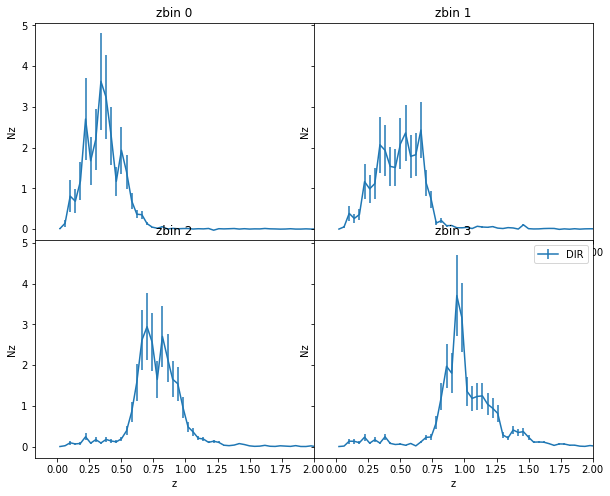

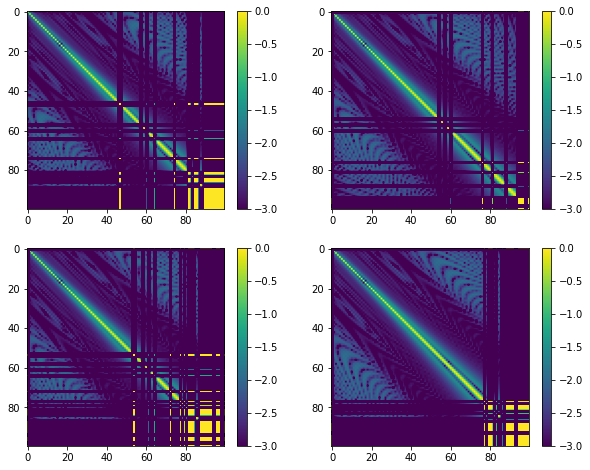

DESwl__0 0.3717194583145684 0.0005804994782124366 0.010842751964226424 0.010842751964226424
DESwl__1 0.5062540175663707 -4.360819095247104e-07 0.011674950943281822 0.01167495094328182
DESwl__2 0.7763710849632749 0.00018569625562681828 0.008322897125766556 0.008322897125766556
DESwl__3 1.0080105653048095 0.0002321360932859228 0.009549301953110396 0.009549301953110396


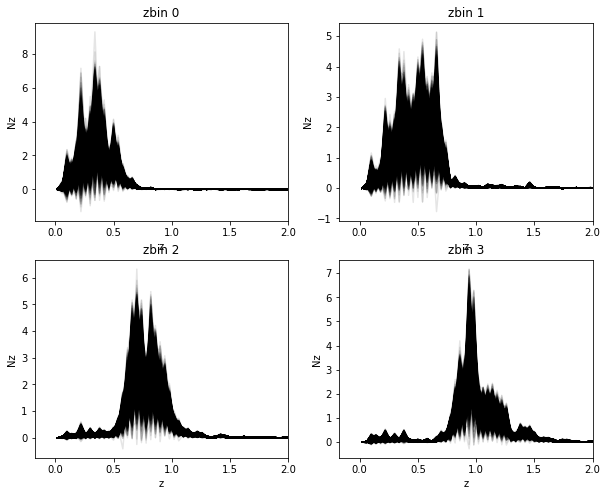

In [8]:
s = sacc.Sacc.load_fits('output/DESwl_NzMarg_full_sample_metacal_R_mlim/DESwl_NzMarg_full_sample_metacal_R_mlim_cls_NzMarg_cov_p5.0_area2_diag1.fits')
cov_master_all = np.load('output/DESwl_NzMarg_full_sample_metacal_R_mlim/DESwl_NzMarg_full_sample_metacal_R_mlim_covar_master_area2.npz')

survey = 'DESwl'
cov_master = cov_master_all[f'{survey}x{survey}']
err_master = np.sqrt(np.diag(cov_master))

f, ax = plt.subplots(2, 2, figsize=(10, 8), gridspec_kw={'hspace': 0, 'wspace':0}, sharey=True)
ax = ax.reshape(-1)
for trn, trv in s.tracers.items():
    if survey not in trn:
        continue
    i = int(trn.split('__')[-1])
        
    # Production
    c = np.sum(trv.nz) * (trv.z[1] - trv.z[0])
    nz = trv.nz / c
    err = nz * err_master
    ax[i].errorbar(trv.z, nz, yerr=err, label='DIR') 
    
    ax[i].set_xlabel('z')
    ax[i].set_ylabel('Nz')
    ax[i].set_title(f'zbin {i}')
    ax[i].set_xlim([None, 2])
plt.legend()
plt.show()


f, ax = plt.subplots(2, 2, figsize=(10, 8),)
ax = ax.reshape(-1)
for trn, trv in s.tracers.items():
    if survey not in trn:
        continue
    i = int(trn.split('__')[-1])
        
    # Production
    c = np.sum(trv.nz) * (trv.z[1] - trv.z[0])
    nz = trv.nz / c
    
    nz_cov = nz[:, None] * nz[None, :] * cov_master + 1e-100

    im = ax[i].imshow(np.log10(np.fabs(get_r(nz_cov))), vmin=-3, vmax=0)
    f.colorbar(im, ax=ax[i], orientation='vertical')  
plt.show()


f, ax = plt.subplots(2, 2, figsize=(10, 8),)
ax = ax.reshape(-1)
for trn, trv in s.tracers.items():
    if survey not in trn:
        continue
    i = int(trn.split('__')[-1])
        
    # Production
    c = np.sum(trv.nz) * (trv.z[1] - trv.z[0])
    nz = trv.nz / c
    
    nz_cov = nz[:, None] * nz[None, :] * cov_master + 1e-100
    zmean = np.sum(nz * trv.z)/np.sum(nz)
    
    nzreal = np.random.multivariate_normal(nz, nz_cov, size=10000)
    zmeans = np.sum(nzreal*trv.z[None, :], axis=-1)/np.sum(nzreal, axis=-1)
    for n in nzreal:
        ax[i].plot(trv.z, n, 'k-', alpha=0.1)
    print(trn, zmean, np.mean(zmeans - zmean), np.std(zmeans - zmean), np.std(zmeans))

    ax[i].set_xlabel('z')
    ax[i].set_ylabel('Nz')
    ax[i].set_title(f'zbin {i}')
    ax[i].set_xlim([None, 2])
    
plt.show()
plt.close()

# $\Delta z$

## DESwl final (COSMOS15 + only cosmology rectangle + metacal weights) -> factor 4 in the diagonal needed to match the DESY1 errors

In [3]:
# Taking into account the correlations between zbins
survey = 'DESwl'

s = sacc.Sacc.load_fits('output/DESwl_final_HSC/DESwl_final_HSC_cls_NzMarg_cov_p5.0_area2_diag4.0.fits')
cov_nz = np.load('output/DESwl_final_HSC/DESwl_final_HSC_covNzMarg_p5.0_diag4.0.npz')['cov_nz']

s.keep_tracers([f'{survey}__{i}' for i in range(4)])
z = s.tracers[f'{survey}__0'].z
nz = np.concatenate([trv.nz * (trv.z[1] - trv.z[0]) for trv in s.tracers.values()])
nzreal = np.random.multivariate_normal(nz, cov_nz[:nz.size][:, :nz.size], size=10000)

nz = nz.reshape(4, z.size)
nzreal = nzreal.reshape(-1, 4, z.size)

print('Tracers, <z>, < <z> - z>, err')
for i in range(4):
    trn = f'{survey}__{i}'
    nzi = nz[i]
#     plt.errorbar(z, nzi, yerr=np.sqrt(np.diag(cov_nz)[i*100 : (i+1) * 100]))
#     plt.show()
#     plt.close()
    zmean = np.sum(nzi * z) / np.sum(nzi)
    zmeans = np.sum(nzreal[:, i] * z[None, :], axis=-1)/np.sum(nzreal[:, i], axis=-1)
    print(trn, zmean, np.mean(zmeans - zmean), np.std(zmeans - zmean))

Tracers, <z>, < <z> - z>, err
DESwl__0 0.3685270542709141 0.0009108024286628629 0.01618666713441757
DESwl__1 0.5031753845600112 0.0002226538748421129 0.017339050551613343
DESwl__2 0.7738361823612186 8.03521368381496e-05 0.013152899761776369
DESwl__3 1.0041227076656956 0.00048700881574452237 0.015265136691863634


## DESwl final mlim (COSMOS15 + only cosmology rectangle + metacal weights) -> factor 2 in the diagonal needed to match DESY1 errors

In [2]:
# Taking into account the correlations between zbins
survey = 'DESwl'

s = sacc.Sacc.load_fits('output/DESwl_final_mlim_HSC/DESwl_final_mlim_HSC_cls_NzMarg_cov_p5.0_area2_diag4.0.fits')
cov_nz = np.load('output/DESwl_final_mlim_HSC/DESwl_final_mlim_HSC_covNzMarg_p5.0_diag4.0.npz')['cov_nz']

s.keep_tracers([f'{survey}__{i}' for i in range(4)])
z = s.tracers[f'{survey}__0'].z
nz = np.concatenate([trv.nz * (trv.z[1] - trv.z[0]) for trv in s.tracers.values()])
nzreal = np.random.multivariate_normal(nz, cov_nz[:nz.size][:, :nz.size], size=10000)

nz = nz.reshape(4, z.size)
nzreal = nzreal.reshape(-1, 4, z.size)

print('Tracers, <z>, < <z> - z>, err')
for i in range(4):
    trn = f'{survey}__{i}'
    nzi = nz[i]
#     plt.errorbar(z, nzi, yerr=np.sqrt(np.diag(cov_nz)[i*100 : (i+1) * 100]))
#     plt.show()
#     plt.close()
    zmean = np.sum(nzi * z) / np.sum(nzi)
    zmeans = np.sum(nzreal[:, i] * z[None, :], axis=-1)/np.sum(nzreal[:, i], axis=-1)
    print(trn, zmean, np.mean(zmeans - zmean), np.std(zmeans - zmean))

/mnt/zfsusers/gravityls_3/.local/lib/python3.6/site-packages/sacc/sacc.py:370: UserWarning: Empty index selected - maybe you should check the tracer order?
  warnings.warn("Empty index selected - maybe you "


Tracers, <z>, < <z> - z>, err
DESwl__0 0.3685270542709141 0.0019515304940769787 0.024729935808946935
DESwl__1 0.5031753845600112 0.0010961286621331693 0.02525180961258592
DESwl__2 0.7738361823612186 0.00045741611877752903 0.018348208026581676
DESwl__3 1.0041227076656956 0.000585048515660899 0.021138397341530793


In [8]:
# Taking into account the correlations between zbins
survey = 'DESwl'

s = sacc.Sacc.load_fits('output/DESwl_final_fixed_HSC/DESwl_final_fixed_HSC_cls_NzMarg_cov_p5.0_area2_diag3.0.fits')
cov_nz = np.load('output/DESwl_final_fixed_HSC/DESwl_final_fixed_HSC_covNzMarg_p5.0_diag3.0.npz')['cov_nz']

s.keep_tracers([f'{survey}__{i}' for i in range(4)])
z = s.tracers[f'{survey}__0'].z
nz = np.concatenate([trv.nz * (trv.z[1] - trv.z[0]) for trv in s.tracers.values()])
nzreal = np.random.multivariate_normal(nz, cov_nz[:nz.size][:, :nz.size], size=10000)

nz = nz.reshape(4, z.size)
nzreal = nzreal.reshape(-1, 4, z.size)

print('Tracers, <z>, < <z> - z>, err')
for i in range(4):
    trn = f'{survey}__{i}'
    nzi = nz[i]
#     plt.errorbar(z, nzi, yerr=np.sqrt(np.diag(cov_nz)[i*100 : (i+1) * 100]))
#     plt.show()
#     plt.close()
    zmean = np.sum(nzi * z) / np.sum(nzi)
    zmeans = np.sum(nzreal[:, i] * z[None, :], axis=-1)/np.sum(nzreal[:, i], axis=-1)
    print(trn, zmean, np.mean(zmeans - zmean), np.std(zmeans - zmean))

Tracers, <z>, < <z> - z>, err
DESwl__0 0.3685270542709141 0.0011757869108464899 0.016657385913125464
DESwl__1 0.5031753845600112 0.00040263990991572474 0.017617906950742265
DESwl__2 0.7738361823612186 0.00027869278395303544 0.013537089638468894
DESwl__3 1.0041227076656956 0.0005865600417941441 0.015026146376589899


In [9]:
# Taking into account the correlations between zbins
survey = 'DESwl'

s = sacc.Sacc.load_fits('output/DESwl_final_mlim_HSC/DESwl_final_mlim_HSC_cls_NzMarg_cov_p5.0_area2_diag2.0.fits')
cov_nz = np.load('output/DESwl_final_mlim_HSC/DESwl_final_mlim_HSC_covNzMarg_p5.0_diag2.0.npz')['cov_nz']

s.keep_tracers([f'{survey}__{i}' for i in range(4)])
z = s.tracers[f'{survey}__0'].z
nz = np.concatenate([trv.nz * (trv.z[1] - trv.z[0]) for trv in s.tracers.values()])
nzreal = np.random.multivariate_normal(nz, cov_nz[:nz.size][:, :nz.size], size=10000)

nz = nz.reshape(4, z.size)
nzreal = nzreal.reshape(-1, 4, z.size)

print('Tracers, <z>, < <z> - z>, err')
for i in range(4):
    trn = f'{survey}__{i}'
    nzi = nz[i]
#     plt.errorbar(z, nzi, yerr=np.sqrt(np.diag(cov_nz)[i*100 : (i+1) * 100]))
#     plt.show()
#     plt.close()
    zmean = np.sum(nzi * z) / np.sum(nzi)
    zmeans = np.sum(nzreal[:, i] * z[None, :], axis=-1)/np.sum(nzreal[:, i], axis=-1)
    print(trn, zmean, np.mean(zmeans - zmean), np.std(zmeans - zmean))

Tracers, <z>, < <z> - z>, err
DESwl__0 0.3685270542709141 0.0006813914582831113 0.016074001729462346
DESwl__1 0.5031753845600112 4.3815749957481566e-05 0.017069532628973295
DESwl__2 0.7738361823612186 0.00022057753308291726 0.012427481467885816
DESwl__3 1.0041227076656956 0.00021287267146127907 0.014537392718755975


In [10]:
# Taking into account the correlations between zbins
survey = 'DESwl'

s = sacc.Sacc.load_fits('output/DESwl_final_mlim_HSC/DESwl_final_mlim_HSC_cls_NzMarg_cov_p5.0_area2_diag1.0.fits')
cov_nz = np.load('output/DESwl_final_mlim_HSC/DESwl_final_mlim_HSC_covNzMarg_p5.0_diag1.0.npz')['cov_nz']

s.keep_tracers([f'{survey}__{i}' for i in range(4)])
z = s.tracers[f'{survey}__0'].z
nz = np.concatenate([trv.nz * (trv.z[1] - trv.z[0]) for trv in s.tracers.values()])
nzreal = np.random.multivariate_normal(nz, cov_nz[:nz.size][:, :nz.size], size=10000)

nz = nz.reshape(4, z.size)
nzreal = nzreal.reshape(-1, 4, z.size)

print('Tracers, <z>, < <z> - z>, err')
for i in range(4):
    trn = f'{survey}__{i}'
    nzi = nz[i]
#     plt.errorbar(z, nzi, yerr=np.sqrt(np.diag(cov_nz)[i*100 : (i+1) * 100]))
#     plt.show()
#     plt.close()
    zmean = np.sum(nzi * z) / np.sum(nzi)
    zmeans = np.sum(nzreal[:, i] * z[None, :], axis=-1)/np.sum(nzreal[:, i], axis=-1)
    print(trn, zmean, np.mean(zmeans - zmean), np.std(zmeans - zmean))

Tracers, <z>, < <z> - z>, err
DESwl__0 0.3685270542709141 0.0003364321769700664 0.011151817866235205
DESwl__1 0.5031753845600112 5.798708925442759e-05 0.011936973131836868
DESwl__2 0.7738361823612186 0.00020934370655047925 0.00880742627230556
DESwl__3 1.0041227076656956 0.00014801810062285437 0.010299766722240623


## DESwl final fixed bias fit (COSMOS15 + only cosmology rectangle + metacal weights) -> factor 3 in the diagonal needed to match DESY1 errors

In [3]:
# Taking into account the correlations between zbins
survey = 'DESwl'

s = sacc.Sacc.load_fits('output/DESwl_final_fixed_HSC/DESwl_final_fixed_HSC_cls_NzMarg_cov_p5.0_area2_diag4.0.fits')
cov_nz = np.load('output/DESwl_final_fixed_HSC/DESwl_final_fixed_HSC_covNzMarg_p5.0_diag4.0.npz')['cov_nz']

s.keep_tracers([f'{survey}__{i}' for i in range(4)])
z = s.tracers[f'{survey}__0'].z
nz = np.concatenate([trv.nz * (trv.z[1] - trv.z[0]) for trv in s.tracers.values()])
nzreal = np.random.multivariate_normal(nz, cov_nz[:nz.size][:, :nz.size], size=10000)

nz = nz.reshape(4, z.size)
nzreal = nzreal.reshape(-1, 4, z.size)

print('Tracers, <z>, < <z> - z>, err')
for i in range(4):
    trn = f'{survey}__{i}'
    nzi = nz[i]
#     plt.errorbar(z, nzi, yerr=np.sqrt(np.diag(cov_nz)[i*100 : (i+1) * 100]))
#     plt.show()
#     plt.close()
    zmean = np.sum(nzi * z) / np.sum(nzi)
    zmeans = np.sum(nzreal[:, i] * z[None, :], axis=-1)/np.sum(nzreal[:, i], axis=-1)
    print(trn, zmean, np.mean(zmeans - zmean), np.std(zmeans - zmean))

Tracers, <z>, < <z> - z>, err
DESwl__0 0.3685270542709141 0.001172132817009387 0.019302258318444173
DESwl__1 0.5031753845600112 0.00026018821966202334 0.020470255544691514
DESwl__2 0.7738361823612186 0.00017964803058453653 0.015795388172746755
DESwl__3 1.0041227076656956 0.000673056283075601 0.017502773995586012


Tracers, <z>, < <z> - z>, err
DESwl__0 0.3685270542709141 0.0005299057151437075 0.016377559090290265
DESwl__1 0.5031753845600112 0.00021284531539804755 0.017355835143222018
DESwl__2 0.7738361823612186 8.203009930637901e-05 0.013436703379873937
DESwl__3 1.0041227076656956 0.0006194532315960173 0.015095795319417493


/tmp/ipykernel_4040/2591274407.py:30: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(np.sqrt(np.diag(cov_nz_fixed) / np.diag(cov_nz)) -1)


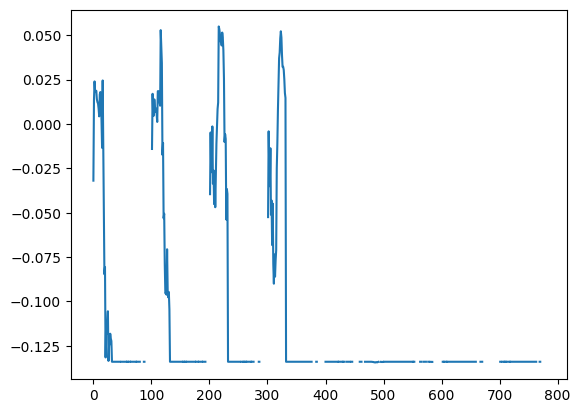

In [12]:
# Taking into account the correlations between zbins
survey = 'DESwl'

s = sacc.Sacc.load_fits('output/DESwl_final_fixed_HSC/DESwl_final_fixed_HSC_cls_NzMarg_cov_p5.0_area2_diag3.0.fits')
cov_nz = np.load('output/DESwl_final_fixed_HSC/DESwl_final_fixed_HSC_covNzMarg_p5.0_diag3.0.npz')['cov_nz']

s.keep_tracers([f'{survey}__{i}' for i in range(4)])
z = s.tracers[f'{survey}__0'].z
nz = np.concatenate([trv.nz * (trv.z[1] - trv.z[0]) for trv in s.tracers.values()])
nzreal = np.random.multivariate_normal(nz, cov_nz[:nz.size][:, :nz.size], size=10000)

nz = nz.reshape(4, z.size)
nzreal = nzreal.reshape(-1, 4, z.size)

print('Tracers, <z>, < <z> - z>, err')
for i in range(4):
    trn = f'{survey}__{i}'
    nzi = nz[i]
#     plt.errorbar(z, nzi, yerr=np.sqrt(np.diag(cov_nz)[i*100 : (i+1) * 100]))
#     plt.show()
#     plt.close()
    zmean = np.sum(nzi * z) / np.sum(nzi)
    zmeans = np.sum(nzreal[:, i] * z[None, :], axis=-1)/np.sum(nzreal[:, i], axis=-1)
    print(trn, zmean, np.mean(zmeans - zmean), np.std(zmeans - zmean))
    
# Compare errors between old version and new
cov_nz = np.load('output/DESwl_final_HSC/DESwl_final_HSC_covNzMarg_p5.0_diag4.0.npz')['cov_nz']
cov_nz_fixed = np.load('output/DESwl_final_fixed_HSC/DESwl_final_fixed_HSC_covNzMarg_p5.0_diag3.0.npz')['cov_nz']

plt.plot(np.sqrt(np.diag(cov_nz_fixed) / np.diag(cov_nz)) -1)
plt.show()

In [4]:
# Taking into account the correlations between zbins
survey = 'DESwl'

s = sacc.Sacc.load_fits('output/DESwl_final_fixed_HSC/DESwl_final_fixed_HSC_cls_NzMarg_cov_p5.0_area2_diag2.0.fits')
cov_nz = np.load('output/DESwl_final_fixed_HSC/DESwl_final_fixed_HSC_covNzMarg_p5.0_diag2.0.npz')['cov_nz']

s.keep_tracers([f'{survey}__{i}' for i in range(4)])
z = s.tracers[f'{survey}__0'].z
nz = np.concatenate([trv.nz * (trv.z[1] - trv.z[0]) for trv in s.tracers.values()])
nzreal = np.random.multivariate_normal(nz, cov_nz[:nz.size][:, :nz.size], size=10000)

nz = nz.reshape(4, z.size)
nzreal = nzreal.reshape(-1, 4, z.size)

print('Tracers, <z>, < <z> - z>, err')
for i in range(4):
    trn = f'{survey}__{i}'
    nzi = nz[i]
#     plt.errorbar(z, nzi, yerr=np.sqrt(np.diag(cov_nz)[i*100 : (i+1) * 100]))
#     plt.show()
#     plt.close()
    zmean = np.sum(nzi * z) / np.sum(nzi)
    zmeans = np.sum(nzreal[:, i] * z[None, :], axis=-1)/np.sum(nzreal[:, i], axis=-1)
    print(trn, zmean, np.mean(zmeans - zmean), np.std(zmeans - zmean))

Tracers, <z>, < <z> - z>, err
DESwl__0 0.3685270542709141 0.0006389807315743593 0.013076077973967941
DESwl__1 0.5031753845600112 3.5955392605552795e-05 0.014288323523577982
DESwl__2 0.7738361823612186 0.00021681538498864787 0.010953992298084705
DESwl__3 1.0041227076656956 0.00042595977490055443 0.012212779099429628


In [5]:
# Taking into account the correlations between zbins
survey = 'DESwl'

s = sacc.Sacc.load_fits('output/DESwl_final_fixed_HSC/DESwl_final_fixed_HSC_cls_NzMarg_cov_p5.0_area2_diag1.0.fits')
cov_nz = np.load('output/DESwl_final_fixed_HSC/DESwl_final_fixed_HSC_covNzMarg_p5.0_diag1.0.npz')['cov_nz']

s.keep_tracers([f'{survey}__{i}' for i in range(4)])
z = s.tracers[f'{survey}__0'].z
nz = np.concatenate([trv.nz * (trv.z[1] - trv.z[0]) for trv in s.tracers.values()])
nzreal = np.random.multivariate_normal(nz, cov_nz[:nz.size][:, :nz.size], size=10000)

nz = nz.reshape(4, z.size)
nzreal = nzreal.reshape(-1, 4, z.size)

print('Tracers, <z>, < <z> - z>, err')
for i in range(4):
    trn = f'{survey}__{i}'
    nzi = nz[i]
#     plt.errorbar(z, nzi, yerr=np.sqrt(np.diag(cov_nz)[i*100 : (i+1) * 100]))
#     plt.show()
#     plt.close()
    zmean = np.sum(nzi * z) / np.sum(nzi)
    zmeans = np.sum(nzreal[:, i] * z[None, :], axis=-1)/np.sum(nzreal[:, i], axis=-1)
    print(trn, zmean, np.mean(zmeans - zmean), np.std(zmeans - zmean))

Tracers, <z>, < <z> - z>, err
DESwl__0 0.3685270542709141 0.00029213538464710156 0.009072994494935458
DESwl__1 0.5031753845600112 0.0002737251156774005 0.009771671012475615
DESwl__2 0.7738361823612186 5.7551649421674015e-05 0.007471631095963915
DESwl__3 1.0041227076656956 0.00020079489015509567 0.008327733256898872


## COSMOS patch

In [2]:
s = sacc.Sacc.load_fits('output/DESwl_HSC/DESwl_HSC_cls_NzMarg_cov_p5.0_area2_diag1.fits')
cov_master_all = np.load('output/DESwl_HSC/DESwl_HSC_covar_master_area2.npz')

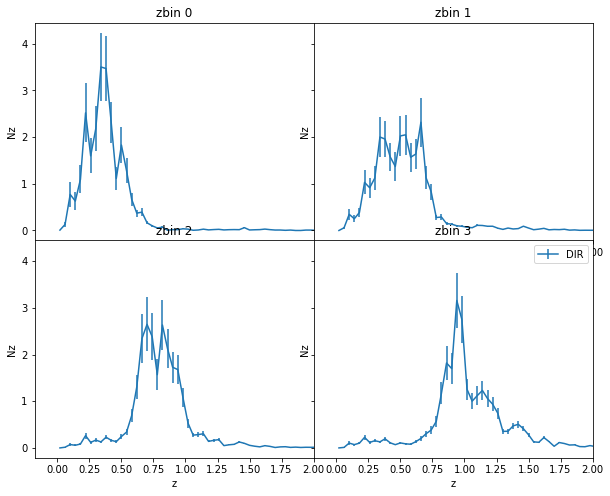

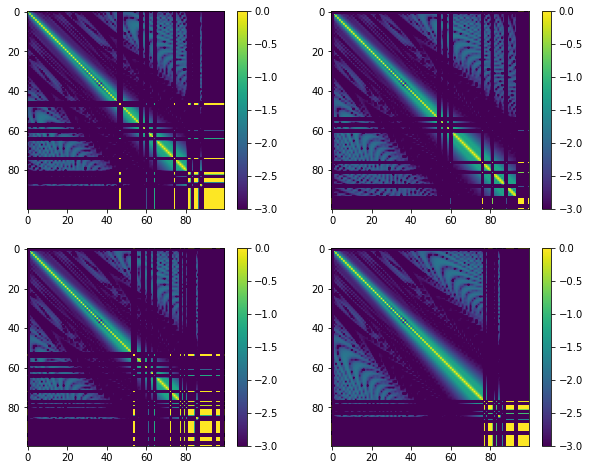

DESwl__0 0.40441458091197324 0.0002211066252214709 0.00780052035723738 0.00780052035723738
DESwl__1 0.5538383777636466 8.601979019918167e-05 0.007976547574473978 0.007976547574473978
DESwl__2 0.8089056801708395 1.5725337356976965e-05 0.005963853915887328 0.005963853915887327
DESwl__3 1.0385548830582785 0.0002025533335844139 0.0063131137920667685 0.0063131137920667685


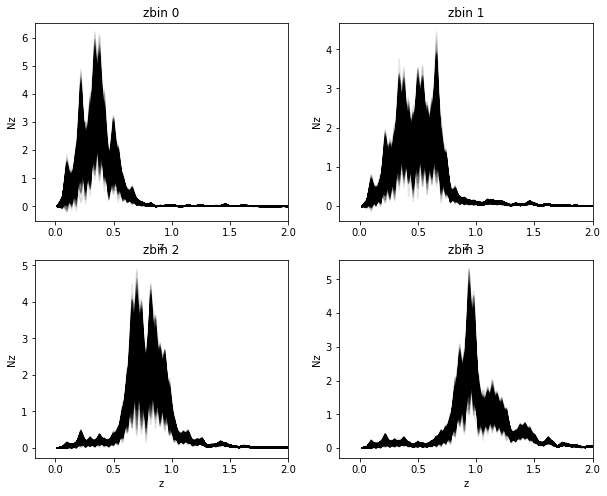

In [5]:
survey = 'DESwl'
cov_master = cov_master_all[f'{survey}x{survey}']
err_master = np.sqrt(np.diag(cov_master))

f, ax = plt.subplots(2, 2, figsize=(10, 8), gridspec_kw={'hspace': 0, 'wspace':0}, sharey=True)
ax = ax.reshape(-1)
for trn, trv in s.tracers.items():
    if survey not in trn:
        continue
    i = int(trn.split('__')[-1])
        
    # Production
    c = np.sum(trv.nz) * (trv.z[1] - trv.z[0])
    nz = trv.nz / c
    err = nz * err_master
    ax[i].errorbar(trv.z, nz, yerr=err, label='DIR') 
    
    ax[i].set_xlabel('z')
    ax[i].set_ylabel('Nz')
    ax[i].set_title(f'zbin {i}')
    ax[i].set_xlim([None, 2])
plt.legend()
plt.show()


f, ax = plt.subplots(2, 2, figsize=(10, 8),)
ax = ax.reshape(-1)
for trn, trv in s.tracers.items():
    if survey not in trn:
        continue
    i = int(trn.split('__')[-1])
        
    # Production
    c = np.sum(trv.nz) * (trv.z[1] - trv.z[0])
    nz = trv.nz / c
    
    nz_cov = nz[:, None] * nz[None, :] * cov_master + 1e-100

    im = ax[i].imshow(np.log10(np.fabs(get_r(nz_cov))), vmin=-3, vmax=0)
    f.colorbar(im, ax=ax[i], orientation='vertical')  
plt.show()


f, ax = plt.subplots(2, 2, figsize=(10, 8),)
ax = ax.reshape(-1)
for trn, trv in s.tracers.items():
    if survey not in trn:
        continue
    i = int(trn.split('__')[-1])
        
    # Production
    c = np.sum(trv.nz) * (trv.z[1] - trv.z[0])
    nz = trv.nz / c
    
    nz_cov = nz[:, None] * nz[None, :] * cov_master + 1e-100
    zmean = np.sum(nz * trv.z)/np.sum(nz)
    
    nzreal = np.random.multivariate_normal(nz, nz_cov, size=10000)
    zmeans = np.sum(nzreal*trv.z[None, :], axis=-1)/np.sum(nzreal, axis=-1)
    for n in nzreal:
        ax[i].plot(trv.z, n, 'k-', alpha=0.1)
    print(trn, zmean, np.mean(zmeans - zmean), np.std(zmeans - zmean), np.std(zmeans))

    ax[i].set_xlabel('z')
    ax[i].set_ylabel('Nz')
    ax[i].set_title(f'zbin {i}')
    ax[i].set_xlim([None, 2])
    
plt.show()
plt.close()

In [9]:
# MCMC way. Not working probably not smooth enough the interp nz model

# survey = 'DESwl'
# cov_master = cov_master_all[f'{survey}x{survey}']
# err_master = np.sqrt(np.diag(cov_master))

# i = 0
# trn = f'{survey}__{i}'
# trv = s.get_tracer(trn)

# # Production
# c = np.sum(trv.nz) * (trv.z[1] - trv.z[0])

# z = trv.z
# nz = trv.nz / c
# nz_cov = nz[:, None] * nz[None, :] * cov_master
# err = nz * err_master + 1e-100

# nz_interp = interp1d(z, nz, kind='cubic', bounds_error=False, fill_value=0)

# def shifted_Nz(z, dz):
#     return nz_interp(z - dz*0.001)

# popt, pcov = curve_fit(shifted_Nz, z, nz, sigma=err, absolute_sigma=True)

# print(popt, pcov)

# plt.errorbar(z, nz, yerr=err)
# plt.plot(z, shifted_Nz(z, *popt))
# plt.ylabel('$N(z)$')
# plt.xlabel('$z$')
# plt.show()
# plt.close()

## DESwl Nz full sample

### diag x1

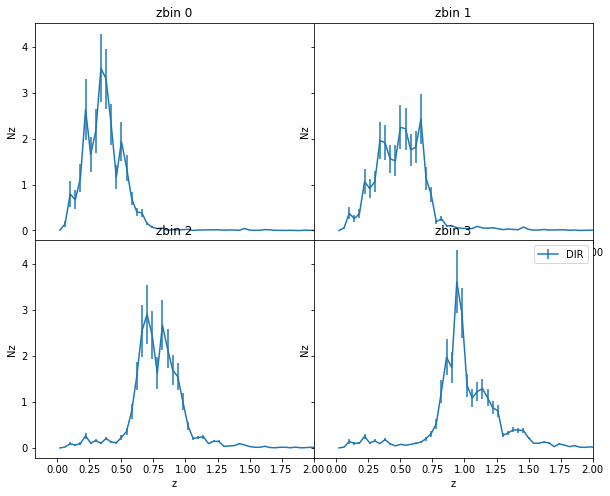

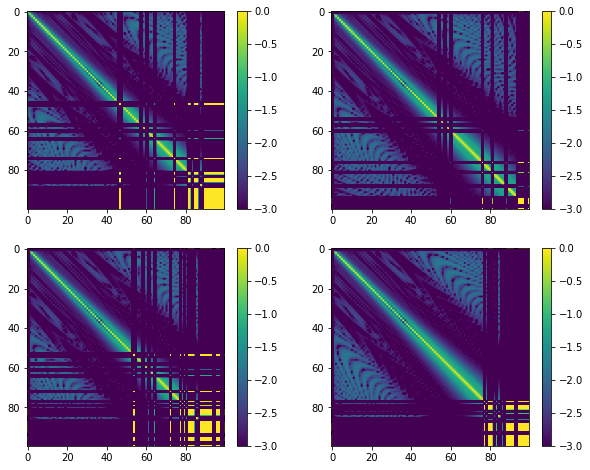

Tracers, <z>, < <z> - z>, err
DESwl__0 0.38104360353911476 0.00020558937471162498 0.007351702942300083 0.0073517029423000825
DESwl__1 0.522592663306421 4.080442426370195e-05 0.007534031856820436 0.007534031856820436
DESwl__2 0.784047821337382 0.0001280833914751721 0.0057981666946466635 0.0057981666946466635
DESwl__3 1.0148881011704198 3.471193063419712e-05 0.006018514686987939 0.006018514686987939


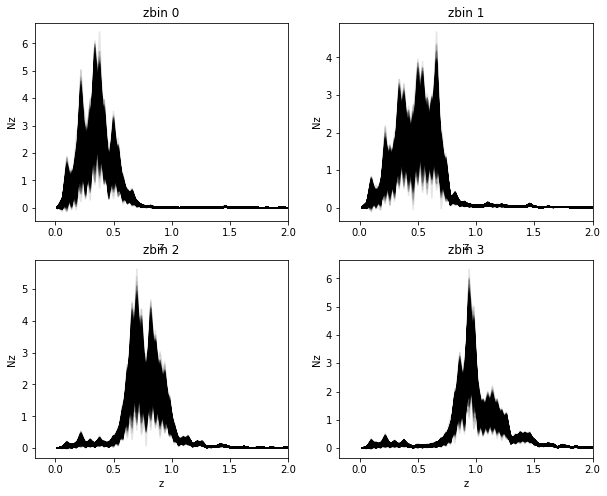

In [3]:
s = sacc.Sacc.load_fits('output/DESwl_full_sample/DESwl_full_sample_cls_NzMarg_cov_p5.0_area2_diag1.fits')
cov_master_all = np.load('output/DESwl_full_sample/DESwl_full_sample_covar_master_area2.npz')

survey = 'DESwl'
cov_master = cov_master_all[f'{survey}x{survey}']
err_master = np.sqrt(np.diag(cov_master))

f, ax = plt.subplots(2, 2, figsize=(10, 8), gridspec_kw={'hspace': 0, 'wspace':0}, sharey=True)
ax = ax.reshape(-1)
for trn, trv in s.tracers.items():
    if survey not in trn:
        continue
    i = int(trn.split('__')[-1])
        
    # Production
    c = np.sum(trv.nz) * (trv.z[1] - trv.z[0])
    nz = trv.nz / c
    err = nz * err_master
    ax[i].errorbar(trv.z, nz, yerr=err, label='DIR') 
    
    ax[i].set_xlabel('z')
    ax[i].set_ylabel('Nz')
    ax[i].set_title(f'zbin {i}')
    ax[i].set_xlim([None, 2])
plt.legend()
plt.show()


f, ax = plt.subplots(2, 2, figsize=(10, 8),)
ax = ax.reshape(-1)
for trn, trv in s.tracers.items():
    if survey not in trn:
        continue
    i = int(trn.split('__')[-1])
        
    # Production
    c = np.sum(trv.nz) * (trv.z[1] - trv.z[0])
    nz = trv.nz / c
    
    nz_cov = nz[:, None] * nz[None, :] * cov_master + 1e-100

    im = ax[i].imshow(np.log10(np.fabs(get_r(nz_cov))), vmin=-3, vmax=0)
    f.colorbar(im, ax=ax[i], orientation='vertical')  
plt.show()


f, ax = plt.subplots(2, 2, figsize=(10, 8),)
ax = ax.reshape(-1)
print('Tracers, <z>, < <z> - z>, err')
for trn, trv in s.tracers.items():
    if survey not in trn:
        continue
    i = int(trn.split('__')[-1])
        
    # Production
    c = np.sum(trv.nz) * (trv.z[1] - trv.z[0])
    nz = trv.nz / c
    
    nz_cov = nz[:, None] * nz[None, :] * cov_master + 1e-100
    zmean = np.sum(nz * trv.z)/np.sum(nz)
    
    nzreal = np.random.multivariate_normal(nz, nz_cov, size=10000)
    zmeans = np.sum(nzreal*trv.z[None, :], axis=-1)/np.sum(nzreal, axis=-1)
    for n in nzreal:
        ax[i].plot(trv.z, n, 'k-', alpha=0.1)
    print(trn, zmean, np.mean(zmeans - zmean), np.std(zmeans - zmean), np.std(zmeans))

    ax[i].set_xlabel('z')
    ax[i].set_ylabel('Nz')
    ax[i].set_title(f'zbin {i}')
    ax[i].set_xlim([None, 2])
    
plt.show()
plt.close()

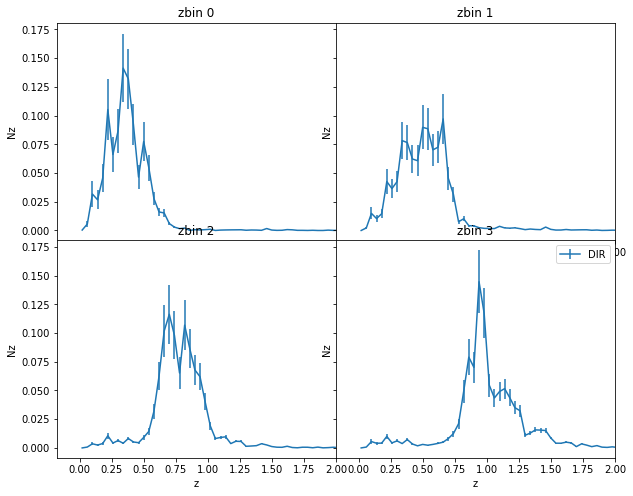

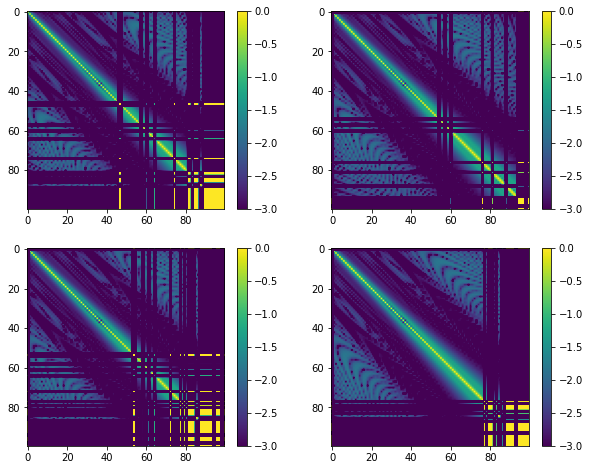

Tracers, <z>, < <z> - z>, err
DESwl__0 0.38104360353911465 0.00021471146808101739 0.007288560958555605 0.007288560958555605
DESwl__1 0.522592663306421 -2.6072945908901706e-05 0.007620794456598326 0.007620794456598326
DESwl__2 0.7840478213373823 0.00011736840912099802 0.005755003313790608 0.005755003313790608
DESwl__3 1.0148881011704198 3.4267756712930844e-05 0.006001531548840319 0.006001531548840319


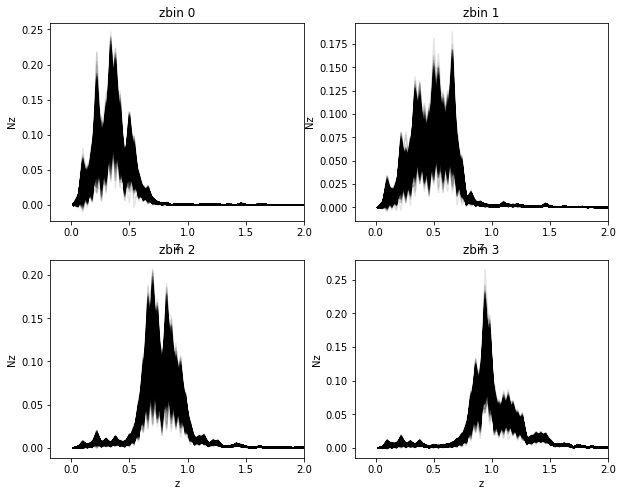

In [24]:
# Nz as in the code (\sum nz = ngal)
s = sacc.Sacc.load_fits('output/DESwl_full_sample/DESwl_full_sample_cls_NzMarg_cov_p5.0_area2_diag4.0.fits')
cov_master_all = np.load('output/DESwl_full_sample/DESwl_full_sample_covar_master_area2.npz')

survey = 'DESwl'
cov_master = cov_master_all[f'{survey}x{survey}']
err_master = np.sqrt(np.diag(cov_master))

f, ax = plt.subplots(2, 2, figsize=(10, 8), gridspec_kw={'hspace': 0, 'wspace':0}, sharey=True)
ax = ax.reshape(-1)
for trn, trv in s.tracers.items():
    if survey not in trn:
        continue
    i = int(trn.split('__')[-1])
        
    # Production
    nz = trv.nz * (trv.z[1] - trv.z[0])
#     nz /= np.sum(nz)
    err = nz * err_master
    ax[i].errorbar(trv.z, nz, yerr=err, label='DIR') 
    
    ax[i].set_xlabel('z')
    ax[i].set_ylabel('Nz')
    ax[i].set_title(f'zbin {i}')
    ax[i].set_xlim([None, 2])
plt.legend()
plt.show()


f, ax = plt.subplots(2, 2, figsize=(10, 8),)
ax = ax.reshape(-1)
for trn, trv in s.tracers.items():
    if survey not in trn:
        continue
    i = int(trn.split('__')[-1])
        
    # Production
    nz = trv.nz * (trv.z[1] - trv.z[0])
#     nz /= np.sum(nz)
    
    nz_cov = nz[:, None] * nz[None, :] * cov_master + 1e-100

    im = ax[i].imshow(np.log10(np.fabs(get_r(nz_cov))), vmin=-3, vmax=0)
    f.colorbar(im, ax=ax[i], orientation='vertical')  
plt.show()


f, ax = plt.subplots(2, 2, figsize=(10, 8),)
ax = ax.reshape(-1)
print('Tracers, <z>, < <z> - z>, err')
for trn, trv in s.tracers.items():
    if survey not in trn:
        continue
    i = int(trn.split('__')[-1])
        
    # Production
    nz = trv.nz * (trv.z[1] - trv.z[0])
#     nz /= np.sum(nz)
    
    nz_cov = nz[:, None] * nz[None, :] * cov_master + 1e-100
    zmean = np.sum(nz * trv.z)/np.sum(nz)
    
    nzreal = np.random.multivariate_normal(nz, nz_cov, size=10000)
    zmeans = np.sum(nzreal*trv.z[None, :], axis=-1)/np.sum(nzreal, axis=-1)
    for n in nzreal:
        ax[i].plot(trv.z, n, 'k-', alpha=0.1)
    print(trn, zmean, np.mean(zmeans - zmean), np.std(zmeans - zmean), np.std(zmeans))

    ax[i].set_xlabel('z')
    ax[i].set_ylabel('Nz')
    ax[i].set_title(f'zbin {i}')
    ax[i].set_xlim([None, 2])
    
plt.show()
plt.close()

### diag 4

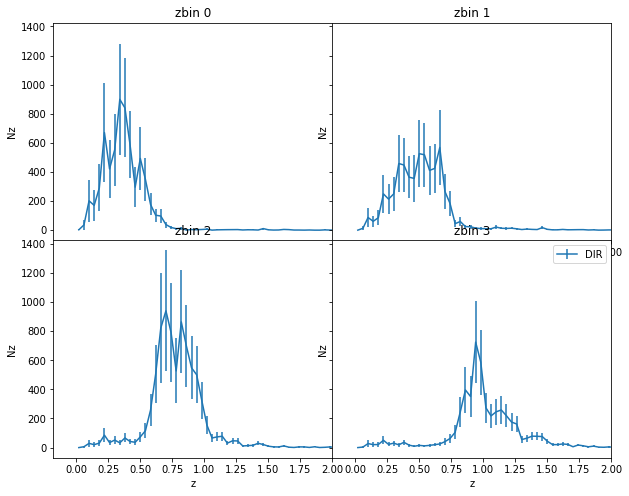

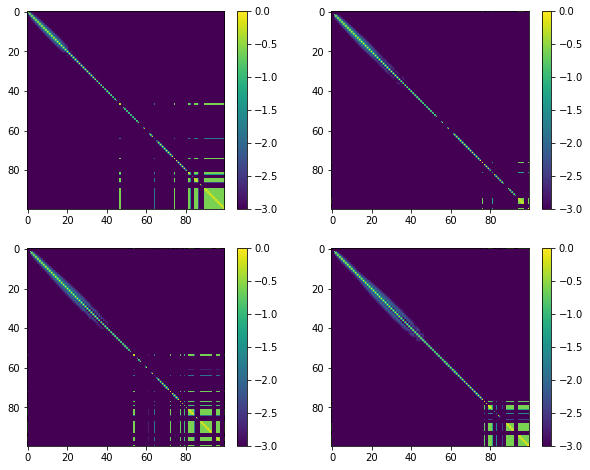

Tracers, <z>, < <z> - z>, err
DESwl__0 0.38104360353911476 0.0007855816608703742 0.016463527777955157 0.016463527777955157
DESwl__1 0.522592663306421 0.00020748549388988326 0.017638079314990323 0.017638079314990323
DESwl__2 0.784047821337382 0.00013448184580618826 0.013482683551369046 0.013482683551369046
DESwl__3 1.0148881011704198 0.0004687975862713096 0.015811400382205888 0.015811400382205888


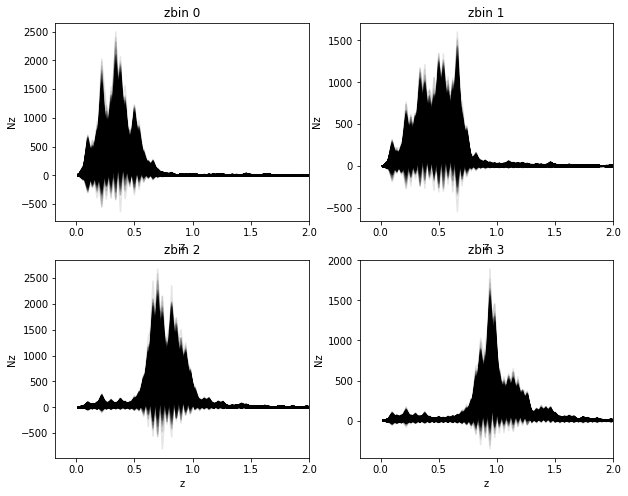

In [47]:
# Nz as in the code (\sum nz = ngal) + diag4
s = sacc.Sacc.load_fits('output/DESwl_full_sample/DESwl_full_sample_cls_NzMarg_cov_p5.0_area2_diag4.0.fits')
cov_master_all = np.load('output/DESwl_full_sample/DESwl_full_sample_covar_master_area2.npz')

survey = 'DESwl'
cov_master = cov_master_all[f'{survey}x{survey}']

f, ax = plt.subplots(2, 2, figsize=(10, 8), gridspec_kw={'hspace': 0, 'wspace':0}, sharey=True)
ax = ax.reshape(-1)
for trn, trv in s.tracers.items():
    if survey not in trn:
        continue
    i = int(trn.split('__')[-1])
        
    # Production
    nz = trv.nz * (trv.z[1] - trv.z[0])
#     nz /= np.sum(nz)
    nz_cov = nz[:, None] * nz[None, :] * cov_master + 1e-100
    nz_cov += np.diag(nz) # Poisson noise
    nz_cov += 3 * np.diag(np.diag(nz_cov))
    err = np.sqrt(np.diag(nz_cov))
    
    ax[i].errorbar(trv.z, nz, yerr=err, label='DIR')
    
    ax[i].set_xlabel('z')
    ax[i].set_ylabel('Nz')
    ax[i].set_title(f'zbin {i}')
    ax[i].set_xlim([None, 2])
plt.legend()
plt.show()


f, ax = plt.subplots(2, 2, figsize=(10, 8),)
ax = ax.reshape(-1)
for trn, trv in s.tracers.items():
    if survey not in trn:
        continue
    i = int(trn.split('__')[-1])
        
    # Production
    nz = trv.nz * (trv.z[1] - trv.z[0])
#     nz /= np.sum(nz)
    
    nz_cov = nz[:, None] * nz[None, :] * cov_master + 1e-100
    nz_cov += np.diag(nz) # Poisson noise
    nz_cov += 3 * np.diag(np.diag(nz_cov))
    
    im = ax[i].imshow(np.log10(np.fabs(get_r(nz_cov))), vmin=-3, vmax=0)
    f.colorbar(im, ax=ax[i], orientation='vertical')  
plt.show()


f, ax = plt.subplots(2, 2, figsize=(10, 8),)
ax = ax.reshape(-1)
print('Tracers, <z>, < <z> - z>, err')
for trn, trv in s.tracers.items():
    if survey not in trn:
        continue
    i = int(trn.split('__')[-1])
        
    # Production
    nz = trv.nz * (trv.z[1] - trv.z[0])
#     nz /= np.sum(nz)
    
    nz_cov = nz[:, None] * nz[None, :] * cov_master + 1e-100
    nz_cov += np.diag(nz) # Poisson noise
    nz_cov += 3 * np.diag(np.diag(nz_cov))
    
    zmean = np.sum(nz * trv.z)/np.sum(nz)
    
    nzreal = np.random.multivariate_normal(nz, nz_cov, size=10000)
    zmeans = np.sum(nzreal*trv.z[None, :], axis=-1)/np.sum(nzreal, axis=-1)
    for n in nzreal:
        ax[i].plot(trv.z, n, 'k-', alpha=0.1)
    print(trn, zmean, np.mean(zmeans - zmean), np.std(zmeans - zmean), np.std(zmeans))

    ax[i].set_xlabel('z')
    ax[i].set_ylabel('Nz')
    ax[i].set_title(f'zbin {i}')
    ax[i].set_xlim([None, 2])
    
plt.show()
plt.close()

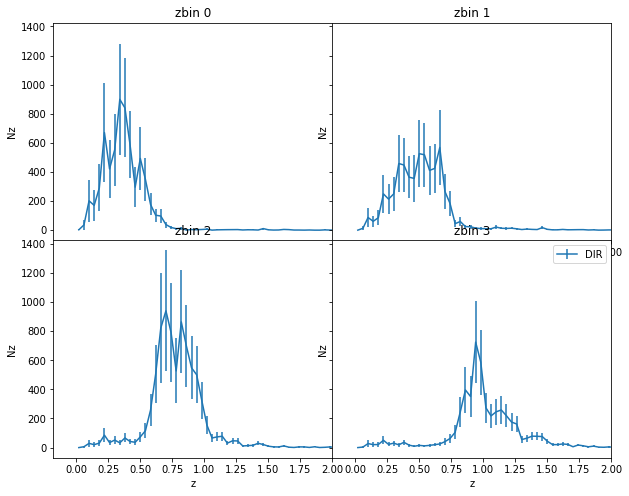

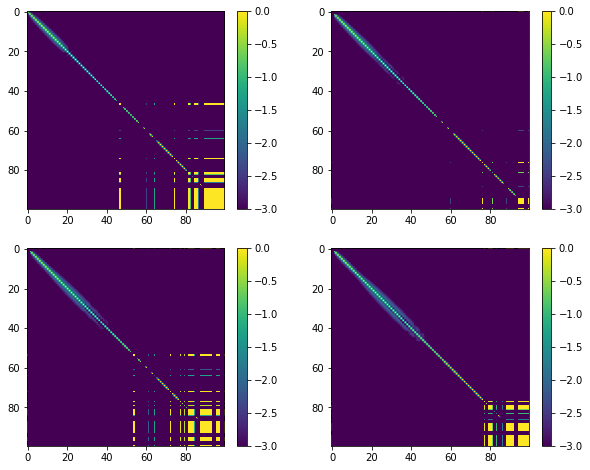

Tracers, <z>, < <z> - z>, err
DESwl__0 0.38104360353911476 0.0008127284893119615 0.01638634969041522 0.01638634969041522
DESwl__1 0.522592663306421 0.0003177137866252372 0.017480455496600263 0.017480455496600263
DESwl__2 0.784047821337382 0.0005013188874178912 0.013465192169103428 0.013465192169103428
DESwl__3 1.0148881011704198 0.0006871850300612243 0.015745088918372584 0.015745088918372584


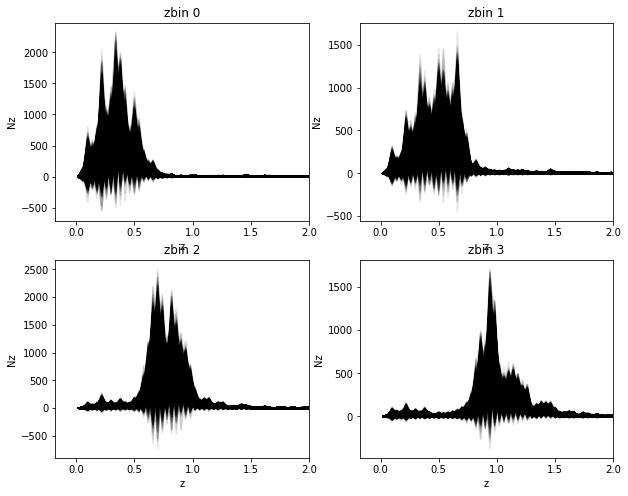

In [31]:
# Diag 4
s = sacc.Sacc.load_fits('output/DESwl_full_sample/DESwl_full_sample_cls_NzMarg_cov_p5.0_area2_diag4.0.fits')
cov_master_all = np.load('output/DESwl_full_sample/DESwl_full_sample_covar_master_area2.npz')

survey = 'DESwl'
cov_nz = np.load('output/DESwl_full_sample/DESwl_full_sample_covNzMarg_p5.0_diag4.0.npz')['cov_nz']

nzi = s.tracers['DESwl__0'].z.size
cov_nz = cov_nz.reshape(4, nzi, 4, nzi)

f, ax = plt.subplots(2, 2, figsize=(10, 8), gridspec_kw={'hspace': 0, 'wspace':0}, sharey=True)
ax = ax.reshape(-1)
for trn, trv in s.tracers.items():
    if survey not in trn:
        continue
    i = int(trn.split('__')[-1])
        
    # Production
    nz = trv.nz * (trv.z[1] - trv.z[0])
    err = np.sqrt(np.diag(cov_nz[i, :, i, :]))
    ax[i].errorbar(trv.z, nz, yerr=err, label='DIR') 
    
    ax[i].set_xlabel('z')
    ax[i].set_ylabel('Nz')
    ax[i].set_title(f'zbin {i}')
    ax[i].set_xlim([None, 2])
plt.legend()
plt.show()


f, ax = plt.subplots(2, 2, figsize=(10, 8),)
ax = ax.reshape(-1)
for trn, trv in s.tracers.items():
    if survey not in trn:
        continue
    i = int(trn.split('__')[-1])
        
    # Production    
    nz_cov = cov_nz[i, :, i, :] + 1e-100

    im = ax[i].imshow(np.log10(np.fabs(get_r(nz_cov))), vmin=-3, vmax=0)
    f.colorbar(im, ax=ax[i], orientation='vertical')  
plt.show()


f, ax = plt.subplots(2, 2, figsize=(10, 8),)
ax = ax.reshape(-1)
print('Tracers, <z>, < <z> - z>, err')
for trn, trv in s.tracers.items():
    if survey not in trn:
        continue
    i = int(trn.split('__')[-1])
        
    # Production
    nz = trv.nz * (trv.z[1] - trv.z[0])
    
    nz_cov = cov_nz[i, :, i, :] + 1e-100
    zmean = np.sum(nz * trv.z)/np.sum(nz)
    
    nzreal = np.random.multivariate_normal(nz, nz_cov, size=10000)
    zmeans = np.sum(nzreal*trv.z[None, :], axis=-1)/np.sum(nzreal, axis=-1)
    for n in nzreal:
        ax[i].plot(trv.z, n, 'k-', alpha=0.1)
    print(trn, zmean, np.mean(zmeans - zmean), np.std(zmeans - zmean), np.std(zmeans))

    ax[i].set_xlabel('z')
    ax[i].set_ylabel('Nz')
    ax[i].set_title(f'zbin {i}')
    ax[i].set_xlim([None, 2])
    
plt.show()
plt.close()

In [54]:
# Taking into account the correlations between zbins
s = sacc.Sacc.load_fits('output/DESwl_full_sample/DESwl_full_sample_cls_NzMarg_cov_p5.0_area2_diag4.0.fits')
cov_master_all = np.load('output/DESwl_full_sample/DESwl_full_sample_covar_master_area2.npz')

survey = 'DESwl'
cov_nz = np.load('output/DESwl_full_sample/DESwl_full_sample_covNzMarg_p5.0_diag4.0.npz')['cov_nz']

z = s.tracers['DESwl__0'].z
nz = np.concatenate([trv.nz * (trv.z[1] - trv.z[0]) for trv in s.tracers.values()])
nzreal = np.random.multivariate_normal(nz, cov_nz, size=10000)

nz = nz.reshape(4, z.size)
nzreal = nzreal.reshape(-1, 4, z.size)

print('Tracers, <z>, < <z> - z>, err')
for i in range(4):
    nzi = nz[i]
    zmean = np.sum(nzi * z) / np.sum(nzi)
    zmeans = np.sum(nzreal[:, i] * z[None, :], axis=-1)/np.sum(nzreal[:, i], axis=-1)
    print(trn, zmean, np.mean(zmeans - zmean), np.std(zmeans - zmean))

Tracers, <z>, < <z> - z>, err
DESwl__3 0.38104360353911476 0.0008984372018802372 0.01646013185643915
DESwl__3 0.522592663306421 0.0003308787606807241 0.017952340018608817
DESwl__3 0.784047821337382 0.0004188022080053506 0.013660472669684955
DESwl__3 1.0148881011704198 0.0007109042401229178 0.01569868855765331


## HSC

### diag 1

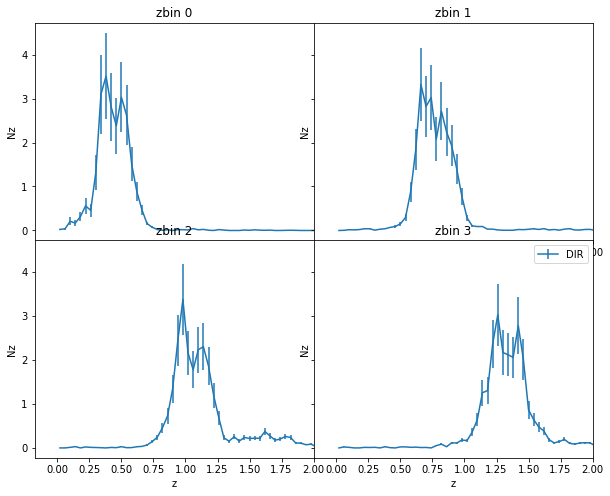

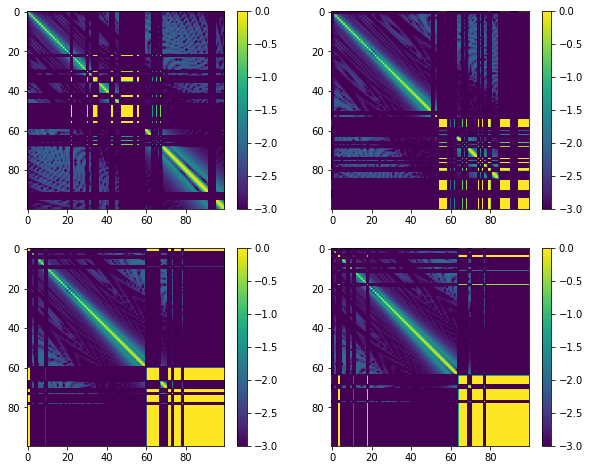

HSC__0 0.5606466833809716 0.0007034999248317122 0.014567757880634831
HSC__1 0.789379093215258 0.00020987678384147727 0.007374198123357099
HSC__2 1.1257938187080632 0.00024597525799892404 0.009065608489960521
HSC__3 1.3471322436021211 9.257364619698207e-05 0.007015665361868379


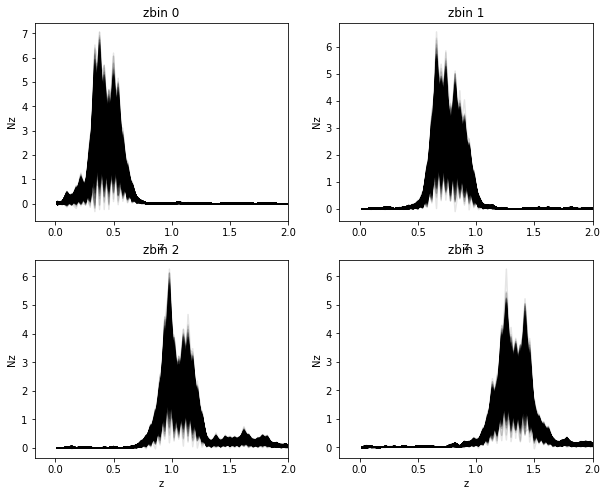

In [7]:
survey = 'HSC'
cov_master = cov_master_all[f'{survey}x{survey}']
err_master = np.sqrt(np.diag(cov_master))

f, ax = plt.subplots(2, 2, figsize=(10, 8), gridspec_kw={'hspace': 0, 'wspace':0}, sharey=True)
ax = ax.reshape(-1)
for trn, trv in s.tracers.items():
    if survey not in trn:
        continue
    i = int(trn.split('__')[-1])
        
    # Production
    c = np.sum(trv.nz) * (trv.z[1] - trv.z[0])
    nz = trv.nz / c
    err = nz * err_master
    ax[i].errorbar(trv.z, nz, yerr=err, label='DIR') 
    
    ax[i].set_xlabel('z')
    ax[i].set_ylabel('Nz')
    ax[i].set_title(f'zbin {i}')
    ax[i].set_xlim([None, 2])
plt.legend()
plt.show()


f, ax = plt.subplots(2, 2, figsize=(10, 8),)
ax = ax.reshape(-1)
for trn, trv in s.tracers.items():
    if survey not in trn:
        continue
    i = int(trn.split('__')[-1])
        
    # Production
    c = np.sum(trv.nz) * (trv.z[1] - trv.z[0])
    nz = trv.nz / c
    
    nz_cov = nz[:, None] * nz[None, :] * cov_master + 1e-100

    im = ax[i].imshow(np.log10(np.fabs(get_r(nz_cov))), vmin=-3, vmax=0)
    f.colorbar(im, ax=ax[i], orientation='vertical')  
plt.show()


f, ax = plt.subplots(2, 2, figsize=(10, 8),)
ax = ax.reshape(-1)
for trn, trv in s.tracers.items():
    if survey not in trn:
        continue
    i = int(trn.split('__')[-1])
        
    # Production
    c = np.sum(trv.nz) * (trv.z[1] - trv.z[0])
    nz = trv.nz / c
    
    nz_cov = nz[:, None] * nz[None, :] * cov_master + 1e-100
    zmean = np.sum(nz * trv.z)/np.sum(nz)
    
    nzreal = np.random.multivariate_normal(nz, nz_cov, size=10000)
    zmeans = np.sum(nzreal*trv.z[None, :], axis=-1)/np.sum(nzreal, axis=-1)
    for n in nzreal:
        ax[i].plot(trv.z, n, 'k-', alpha=0.1)
    print(trn, zmean, np.mean(zmeans - zmean), np.std(zmeans - zmean))

    ax[i].set_xlabel('z')
    ax[i].set_ylabel('Nz')
    ax[i].set_title(f'zbin {i}')
    ax[i].set_xlim([None, 2])
    
plt.show()
plt.close()

In [ ]:
# print('Tracers, <z>, < <z> - z>, err')


### diag 3 (final) [in paper - fix DES fit bin - v1]

In [25]:
# Taking into account the correlations between zbins
survey = 'HSC'

s = sacc.Sacc.load_fits('output/DESwl_final_fixed_HSC/DESwl_final_fixed_HSC_cls_NzMarg_cov_p5.0_area2_diag3.0.fits')
cov_nz = np.load('output/DESwl_final_fixed_HSC/DESwl_final_fixed_HSC_covNzMarg_p5.0_diag3.0.npz')['cov_nz']

s.keep_tracers([f'{survey}__{i}' for i in range(4)])
z = s.tracers[f'{survey}__0'].z
nz = np.concatenate([trv.nz * (trv.z[1] - trv.z[0]) for trv in s.tracers.values()])
nzreal = np.random.multivariate_normal(nz, cov_nz[-nz.size:][:, -nz.size:], size=10000)

nz = nz.reshape(4, z.size)
nzreal = nzreal.reshape(-1, 4, z.size)

print('Tracers, <z>, < <z> - z>, err')
for i in range(4):
    trn = f'{survey}__{i}'
    nzi = nz[i]
    zmean = np.sum(nzi * z) / np.sum(nzi)
    zmeans = np.sum(nzreal[:, i] * z[None, :], axis=-1)/np.sum(nzreal[:, i], axis=-1)
    print(trn, zmean, np.mean(zmeans - zmean), np.std(zmeans - zmean))

/mnt/zfsusers/gravityls_3/.local/lib/python3.6/site-packages/sacc/sacc.py:370: UserWarning: Empty index selected - maybe you should check the tracer order?
  warnings.warn("Empty index selected - maybe you "


Tracers, <z>, < <z> - z>, err
HSC__0 0.5606466833809712 0.0027697926765042806 0.031151196424014403
HSC__1 0.7893790932152582 0.0007282606764740333 0.014425638888331658
HSC__2 1.125793818708063 0.0007764165906847387 0.017755521529564316
HSC__3 1.3471322436021211 0.00037845783218336596 0.015124731753524093


### diag 4 (final) [in paper - arXiv-v0]

In [19]:
# Taking into account the correlations between zbins
survey = 'HSC'

s = sacc.Sacc.load_fits('output/DESwl_final_HSC/DESwl_final_HSC_cls_NzMarg_cov_p5.0_area2_diag4.0.fits')
cov_nz = np.load('output/DESwl_final_HSC/DESwl_final_HSC_covNzMarg_p5.0_diag4.0.npz')['cov_nz']

s.keep_tracers([f'{survey}__{i}' for i in range(4)])
z = s.tracers[f'{survey}__0'].z
nz = np.concatenate([trv.nz * (trv.z[1] - trv.z[0]) for trv in s.tracers.values()])
nzreal = np.random.multivariate_normal(nz, cov_nz[-nz.size:][:, -nz.size:], size=10000)

nz = nz.reshape(4, z.size)
nzreal = nzreal.reshape(-1, 4, z.size)

print('Tracers, <z>, < <z> - z>, err')
for i in range(4):
    trn = f'{survey}__{i}'
    nzi = nz[i]
    zmean = np.sum(nzi * z) / np.sum(nzi)
    zmeans = np.sum(nzreal[:, i] * z[None, :], axis=-1)/np.sum(nzreal[:, i], axis=-1)
    print(trn, zmean, np.mean(zmeans - zmean), np.std(zmeans - zmean))

/mnt/zfsusers/gravityls_3/.local/lib/python3.6/site-packages/sacc/sacc.py:370: UserWarning: Empty index selected - maybe you should check the tracer order?
  warnings.warn("Empty index selected - maybe you "


Tracers, <z>, < <z> - z>, err
HSC__0 0.5606466833809712 0.004307270820902531 0.03695984576479516
HSC__1 0.7893790932152582 0.0010733692675978792 0.01724732553237447
HSC__2 1.125793818708063 0.0011797074006938337 0.020804482262101617
HSC__3 1.3471322436021211 0.0003616000180051864 0.017446649480846326


# Nz Marginalized covariance DES x HSC [in paper - arXiv-v0]

In [2]:
s = sacc.Sacc.load_fits('output/DESwl_final_HSC/DESwl_final_HSC_cls_NzMarg_cov_p5.0_area2_diag4.0.fits')
covf = np.load('output/DESwl_final_HSC/DESwl_final_HSC_covNzMarg_p5.0_diag4.0.npz')
cov_nz_marg = covf['nz_marg']
cov_nzs = covf['cov_nz']

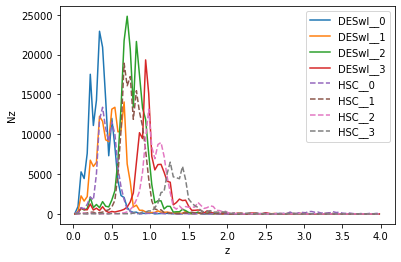

In [3]:
for trn, trv in s.tracers.items():
    if 'HSC' in trn:
        ls = '--'
    else:
        ls = '-'
    plt.plot(trv.z, trv.nz, ls=ls, label=trn)
plt.ylabel('Nz')
plt.xlabel('z')
plt.legend()
plt.show()
plt.close()

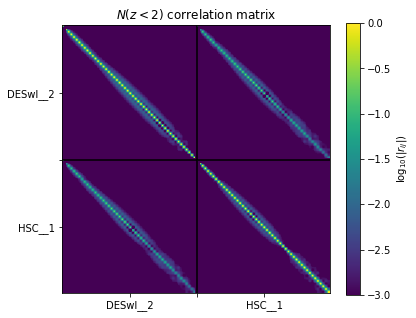

In [4]:
tr = s.tracers['DESwl__2']
sel = np.sum(tr.z < 2)

ix1_des = 3 * 100
ix2_des = ix1_des + sel

ix1_hsc = 400 + 1 * 100
ix2_hsc = ix1_hsc + sel

ticks = [int(sel / 2), sel, int(3*sel/2)]

c_des_des = cov_nzs[ix1_des:ix2_des][:, ix1_des:ix2_des]
c_des_hsc = cov_nzs[ix1_des:ix2_des][:, ix1_hsc:ix2_hsc]
c_hsc_des = c_des_hsc.T
c_hsc_hsc = cov_nzs[ix1_hsc:ix2_hsc][:, ix1_hsc:ix2_hsc]

c = np.block([[c_des_des, c_des_hsc], [c_hsc_des, c_hsc_hsc]])

f, ax = plt.subplots(1, 1, figsize=(6, 5))
im = ax.imshow(np.log10(np.fabs(get_r(c + 1e-100))), vmin=-3, vmax=0)
cbar = f.colorbar(im)

cbar.set_label('$\log_{10}(|r_{ij}|)$')

ax.axvline(sel, color='k')
ax.axhline(sel, color='k')

ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_yticklabels(['DESwl__2', '', 'HSC__1'])
ax.set_xticklabels(['DESwl__2', '', 'HSC__1'])

ax.set_title(r'$N(z<2)$ correlation matrix')
plt.show()
plt.close()

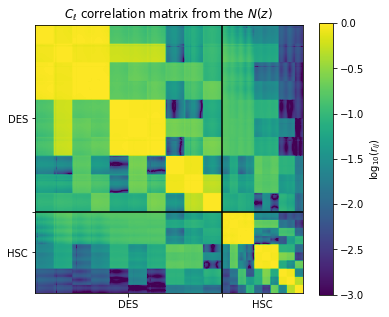

In [8]:
c = 0
for trs in s.get_tracer_combinations():
    if ('DES' in trs[0]) or ('DES' in trs[1]):
        c += 1
        
ix1 = s.indices(data_type='cl_ee', tracers=('DESwl__2', 'DESwl__2'))
sel = c * ix1.size

f, ax = plt.subplots(1, 1, figsize=(6, 5))
im = ax.imshow(np.log10(np.fabs(get_r(cov_nz_marg + 1e-100))), vmin=-3, vmax=0)
cbar = f.colorbar(im)

cbar.set_label('$\log_{10}(r_{ij})$')

ax.axvline(sel, color='k')
ax.axhline(sel, color='k')

ticks = [int(sel / 2), sel, int((s.mean.size + sel) / 2)]

ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_yticklabels(['DES', '', 'HSC'])
ax.set_xticklabels(['DES', '', 'HSC'])

ax.set_title(r'$C_\ell$ correlation matrix from the $N(z)$')
plt.show()
plt.close()

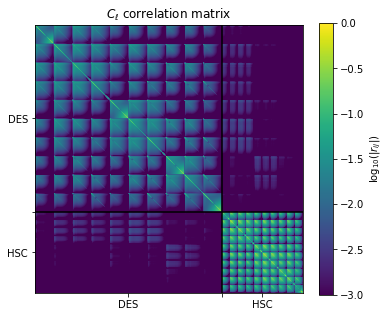

In [9]:
c = 0
for trs in s.get_tracer_combinations():
    if ('DES' in trs[0]) or ('DES' in trs[1]):
        c += 1
        
ix1 = s.indices(data_type='cl_ee', tracers=('DESwl__2', 'DESwl__2'))
sel = c * ix1.size

f, ax = plt.subplots(1, 1, figsize=(6, 5))
im = ax.imshow(np.log10(np.fabs(get_r(s.covariance.covmat + 1e-100))), vmin=-3, vmax=0)
cbar = f.colorbar(im)

cbar.set_label('$\log_{10}(|r_{ij}|)$')

ax.axvline(sel, color='k')
ax.axhline(sel, color='k')

ticks = [int(sel / 2), sel, int((s.mean.size + sel) / 2)]

ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_yticklabels(['DES', '', 'HSC'])
ax.set_xticklabels(['DES', '', 'HSC'])

ax.set_title(r'$C_\ell$ correlation matrix')
plt.show()
plt.close()

# Nz Marginalized covariance DES x HSC [in paper - v1 (fixed bias fit)]

In [20]:
s = sacc.Sacc.load_fits('output/DESwl_final_fixed_HSC/DESwl_final_fixed_HSC_cls_NzMarg_cov_p5.0_area2_diag3.0.fits')
covf = np.load('output/DESwl_final_fixed_HSC/DESwl_final_fixed_HSC_covNzMarg_p5.0_diag3.0.npz')
cov_nz_marg = covf['nz_marg']
cov_nzs = covf['cov_nz']

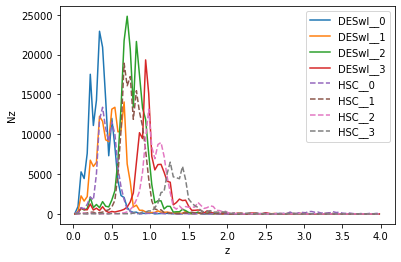

In [21]:
for trn, trv in s.tracers.items():
    if 'HSC' in trn:
        ls = '--'
    else:
        ls = '-'
    plt.plot(trv.z, trv.nz, ls=ls, label=trn)
plt.ylabel('Nz')
plt.xlabel('z')
plt.legend()
plt.show()
plt.close()

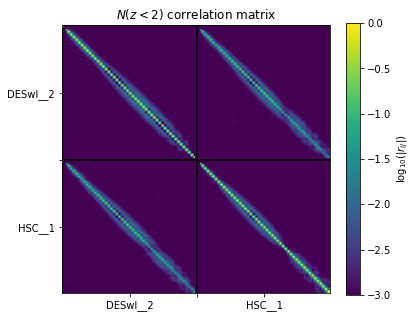

In [22]:
tr = s.tracers['DESwl__2']
sel = np.sum(tr.z < 2)

ix1_des = 3 * 100
ix2_des = ix1_des + sel

ix1_hsc = 400 + 1 * 100
ix2_hsc = ix1_hsc + sel

ticks = [int(sel / 2), sel, int(3*sel/2)]

c_des_des = cov_nzs[ix1_des:ix2_des][:, ix1_des:ix2_des]
c_des_hsc = cov_nzs[ix1_des:ix2_des][:, ix1_hsc:ix2_hsc]
c_hsc_des = c_des_hsc.T
c_hsc_hsc = cov_nzs[ix1_hsc:ix2_hsc][:, ix1_hsc:ix2_hsc]

c = np.block([[c_des_des, c_des_hsc], [c_hsc_des, c_hsc_hsc]])

f, ax = plt.subplots(1, 1, figsize=(6, 5))
im = ax.imshow(np.log10(np.fabs(get_r(c + 1e-100))), vmin=-3, vmax=0)
cbar = f.colorbar(im)

cbar.set_label('$\log_{10}(|r_{ij}|)$')

ax.axvline(sel, color='k')
ax.axhline(sel, color='k')

ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_yticklabels(['DESwl__2', '', 'HSC__1'])
ax.set_xticklabels(['DESwl__2', '', 'HSC__1'])

ax.set_title(r'$N(z<2)$ correlation matrix')
plt.show()
plt.close()

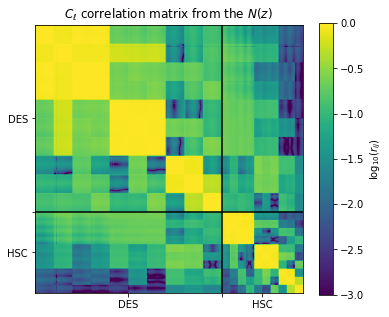

In [23]:
c = 0
for trs in s.get_tracer_combinations():
    if ('DES' in trs[0]) or ('DES' in trs[1]):
        c += 1
        
ix1 = s.indices(data_type='cl_ee', tracers=('DESwl__2', 'DESwl__2'))
sel = c * ix1.size

f, ax = plt.subplots(1, 1, figsize=(6, 5))
im = ax.imshow(np.log10(np.fabs(get_r(cov_nz_marg + 1e-100))), vmin=-3, vmax=0)
cbar = f.colorbar(im)

cbar.set_label('$\log_{10}(r_{ij})$')

ax.axvline(sel, color='k')
ax.axhline(sel, color='k')

ticks = [int(sel / 2), sel, int((s.mean.size + sel) / 2)]

ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_yticklabels(['DES', '', 'HSC'])
ax.set_xticklabels(['DES', '', 'HSC'])

ax.set_title(r'$C_\ell$ correlation matrix from the $N(z)$')
plt.show()
plt.close()

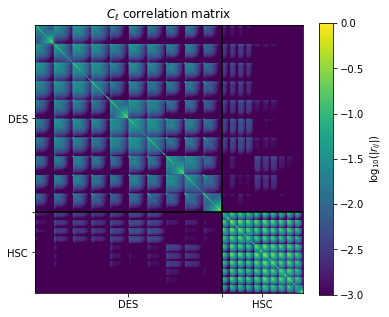

In [24]:
c = 0
for trs in s.get_tracer_combinations():
    if ('DES' in trs[0]) or ('DES' in trs[1]):
        c += 1
        
ix1 = s.indices(data_type='cl_ee', tracers=('DESwl__2', 'DESwl__2'))
sel = c * ix1.size

f, ax = plt.subplots(1, 1, figsize=(6, 5))
im = ax.imshow(np.log10(np.fabs(get_r(s.covariance.covmat + 1e-100))), vmin=-3, vmax=0)
cbar = f.colorbar(im)

cbar.set_label('$\log_{10}(|r_{ij}|)$')

ax.axvline(sel, color='k')
ax.axhline(sel, color='k')

ticks = [int(sel / 2), sel, int((s.mean.size + sel) / 2)]

ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_yticklabels(['DES', '', 'HSC'])
ax.set_xticklabels(['DES', '', 'HSC'])

ax.set_title(r'$C_\ell$ correlation matrix')
plt.show()
plt.close()